# May 12th

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 2000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
english_tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-12', tweet_mode='extended').items(2000)

#store tweets in a variable and get the full text
all_eng_tweets = [tweet.full_text for tweet in english_tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_eng_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,"Not just for altruists, do-gooders, and bleedi..."
1,@adam3us @AriDavidPaul A G7 debt default will ...
2,#Bitcoin A huge thankyou to @cryptocharts_M fo...
3,short squeeze and massive upside #Bitcoin move...
4,$TSLA winnings of initial #BTC investment🙌\n\n...
5,#Bitcoin price in US Dollar #BTC $usd #BTCUSD ...
6,"[₿] #Bitcoin Daily $BTC [₿]\n\nKraken❯\nA:$47,..."
7,How can slim method of Stock Picking is a winn...
8,Hard Rock Punks NFT New Year Extra Minting \nU...
9,Crypto Prices (USD/₿)\n\nBitcoin ➤ $47509.277➶...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,"Not just for altruists, do-gooders, and bleedi...","Not just for altruists, do-gooders, and bleedi..."
1,@adam3us @AriDavidPaul A G7 debt default will ...,@adam3us @AriDavidPaul A G7 debt default will ...
2,#Bitcoin A huge thankyou to @cryptocharts_M fo...,Bitcoin A huge thankyou to @cryptocharts_M for...
3,short squeeze and massive upside #Bitcoin move...,short squeeze and massive upside Bitcoin move....
4,$TSLA winnings of initial #BTC investment🙌\n\n...,$TSLA winnings of initial Bitcoin investment🙌$...


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,"Not just for altruists, do-gooders, and bleedi...","Not just for altruists, do-gooders, and bleedi...",0.000000,0.000000
1,@adam3us @AriDavidPaul A G7 debt default will ...,@adam3us @AriDavidPaul A G7 debt default will ...,0.650000,0.881470
2,#Bitcoin A huge thankyou to @cryptocharts_M fo...,Bitcoin A huge thankyou to @cryptocharts_M for...,0.610000,0.285000
3,short squeeze and massive upside #Bitcoin move...,short squeeze and massive upside Bitcoin move....,0.482993,0.056463
4,$TSLA winnings of initial #BTC investment🙌\n\n...,$TSLA winnings of initial Bitcoin investment🙌$...,0.200000,-0.075000
5,#Bitcoin price in US Dollar #BTC $usd #BTCUSD ...,Bitcoin price in US Dollar Bitcoin $usd Bitcoi...,0.302222,0.053333
6,"[₿] #Bitcoin Daily $BTC [₿]\n\nKraken❯\nA:$47,...","[₿] Bitcoin Daily $BTC [₿]Kraken❯A:$47,451 L:$...",0.000000,0.000000
7,How can slim method of Stock Picking is a winn...,How can slim method of Stock Picking is a winn...,0.750000,0.500000
8,Hard Rock Punks NFT New Year Extra Minting \nU...,Hard Rock Punks NFT New Year Extra Minting Unt...,0.259242,-0.031061
9,Crypto Prices (USD/₿)\n\nBitcoin ➤ $47509.277➶...,Crypto Prices (USD/₿)Bitcoin ➤ $47509.277➶Ethe...,0.000000,0.000000


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,"Not just for altruists, do-gooders, and bleedi...","Not just for altruists, do-gooders, and bleedi...",0.000000,0.000000,Neutral
1,@adam3us @AriDavidPaul A G7 debt default will ...,@adam3us @AriDavidPaul A G7 debt default will ...,0.650000,0.881470,Positive
2,#Bitcoin A huge thankyou to @cryptocharts_M fo...,Bitcoin A huge thankyou to @cryptocharts_M for...,0.610000,0.285000,Positive
3,short squeeze and massive upside #Bitcoin move...,short squeeze and massive upside Bitcoin move....,0.482993,0.056463,Positive
4,$TSLA winnings of initial #BTC investment🙌\n\n...,$TSLA winnings of initial Bitcoin investment🙌$...,0.200000,-0.075000,Negative
5,#Bitcoin price in US Dollar #BTC $usd #BTCUSD ...,Bitcoin price in US Dollar Bitcoin $usd Bitcoi...,0.302222,0.053333,Positive
6,"[₿] #Bitcoin Daily $BTC [₿]\n\nKraken❯\nA:$47,...","[₿] Bitcoin Daily $BTC [₿]Kraken❯A:$47,451 L:$...",0.000000,0.000000,Neutral
7,How can slim method of Stock Picking is a winn...,How can slim method of Stock Picking is a winn...,0.750000,0.500000,Positive
8,Hard Rock Punks NFT New Year Extra Minting \nU...,Hard Rock Punks NFT New Year Extra Minting Unt...,0.259242,-0.031061,Negative
9,Crypto Prices (USD/₿)\n\nBitcoin ➤ $47509.277➶...,Crypto Prices (USD/₿)Bitcoin ➤ $47509.277➶Ethe...,0.000000,0.000000,Neutral


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


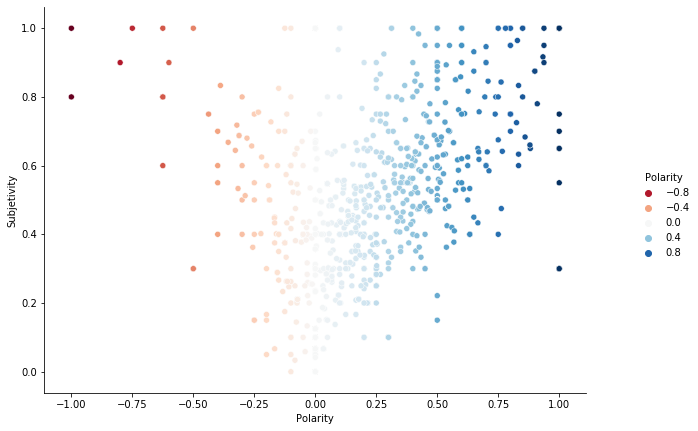

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

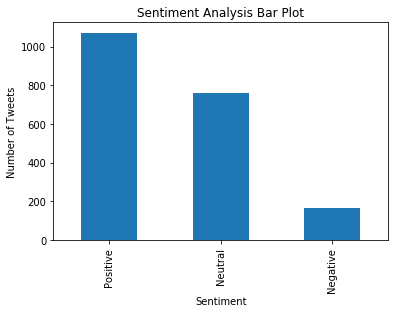

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()